In [1]:
from setup_general import *
from sweep_utilities import *

/home/till/projects/uni/data science/museum_item_classification/setup_general.py:95: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_intermediate_ready = pd.read_csv('./data/general/combined_intermediate_ready.csv', index_col='id', dtype={'type': str})


In [2]:
import seaborn as sns
from math import isnan

In [3]:
additional_name = pd.read_csv('data/typeless/additional_name.csv')
description = pd.read_csv('data/typeless/description.csv', sep=';')
dimensions = pd.read_csv('data/typeless/dimensions.csv')
events = pd.read_csv('data/typeless/events.csv')
general_info = pd.read_csv('data/typeless/general_info.csv', sep=';')
materials = pd.read_csv('data/typeless/materials.csv')
technique = pd.read_csv('data/typeless/technique.csv')

all_types = pd.read_excel('data/typeless/all_types.xlsx')

df_merged = pd.read_csv('data/typeless/all_merged.csv')

/tmp/ipykernel_32324/3832921823.py:11: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,17,18,21,22,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_merged = pd.read_csv('data/typeless/all_merged.csv')


# data analysis - comparison train & inference data set

In [48]:
# !!! idea: compare distribution. especially on this subset
# extra classifier for each museum?

# handling sparse data. especially in iset
# feature 
# feature selection -> add up mi scores for each binary classification task & pick outstanding mi scores for single bin class
# -> anova, kendall, chi2, mi & select k best


In [4]:
cat = ['museum_abbr', 'collection_mark', 'collection_additional_nr', 'state', 'material', 'technique', 'parameter', 'unit']
num = ['musealia_seria_nr', 'musealia_queue_nr', 'ks', 'collection_queue_nr']

In [12]:
iset = df_merged[(df_merged.museum_abbr == 'AM') | (df_merged.museum_abbr == 'ETMM')]
iset = df_merged[(df_merged.museum_abbr == 'ETMM')]
combined_data = combined_data[combined_data.museum_abbr == 'ETMM']

In [13]:
# necessary to even be able to plot
iset['musealia_queue_nr'] = iset['musealia_queue_nr'].apply(lambda x: x if x < 10000000 else np.nan)

/tmp/ipykernel_32324/4171888784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iset['musealia_queue_nr'] = iset['musealia_queue_nr'].apply(lambda x: x if x < 10000000 else np.nan)


In [7]:
def get_relavant_data(data):
    return data[(~ data.material.isnull()) | (~ data.technique.isnull()) | (~ data.parameter.isnull())]

iset = get_relavant_data(iset)

In [15]:
len(iset)

50871

## numeric value distribution

In [ ]:
# very different. might not even include them in model. check feature importance

In [47]:
combined_data.describe()

,ks,musealia_seria_nr,musealia_queue_nr,collection_queue_nr,element_count,is_original
count,4587.000000,3393.000000,1390.000000,5221.000000,8611.0,5751.000000
mean,10478.771092,18257.644857,311.759712,284.211454,1.0,0.931142
std,14022.821919,10240.200342,492.755719,858.094567,0.0,0.253234
min,1.000000,2.000000,1.000000,1.000000,1.0,0.000000
25%,580.000000,12463.000000,12.000000,4.000000,1.0,1.000000
50%,3661.000000,14870.000000,116.000000,34.000000,1.0,1.000000
75%,15080.500000,26726.000000,342.000000,150.000000,1.0,1.000000
max,45121.000000,78633.000000,4268.000000,6323.000000,1.0,1.000000


In [36]:
iset.describe()

,musealia_seria_nr,musealia_queue_nr,ks,collection_queue_nr,value
count,11300.000000,8.134000e+03,6350.000000,2439.000000,10937.000000
mean,23284.420088,1.541814e+03,23586.719213,31.517425,18.575534
std,11231.546587,1.602387e+04,38789.134835,168.237809,32.497014
min,194.000000,1.000000e+00,0.000000,1.000000,0.070000
25%,11555.000000,1.120000e+02,152.000000,1.000000,1.000000
50%,27977.000000,1.147000e+03,1602.000000,1.000000,10.800000
75%,27977.000000,2.210000e+03,60657.750000,8.000000,24.000000
max,41151.000000,1.441843e+06,122999.000000,3493.000000,838.000000


In [8]:
intersection = [i for i in iset.columns if i in combined_data.columns]

In [16]:
df1 = combined_data[intersection]
df1['Class'] = 1
df2 = iset[intersection]
df2['Class'] = 2
df = pd.concat([df1, df2], axis=0)

/tmp/ipykernel_32324/854835924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Class'] = 1


In [ ]:
# test for random split but from same set -> for same distribution?
df1, df2 = train_test_split(df, test_size=0.7, random_state=42)
df1['Class'] = 1
df2['Class'] = 2
df = pd.concat([df1, df2], axis=0)

musealia_seria_nr


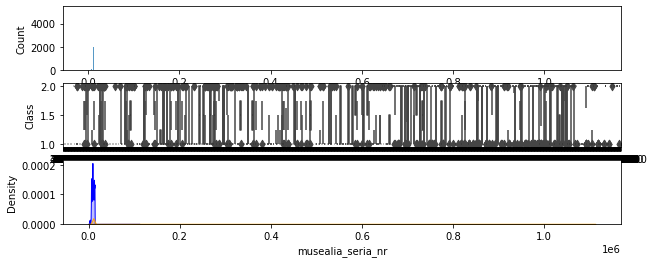

musealia_queue_nr


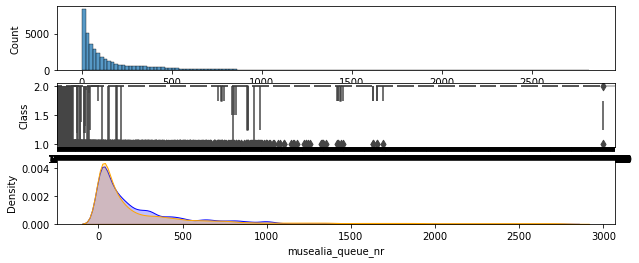

ks


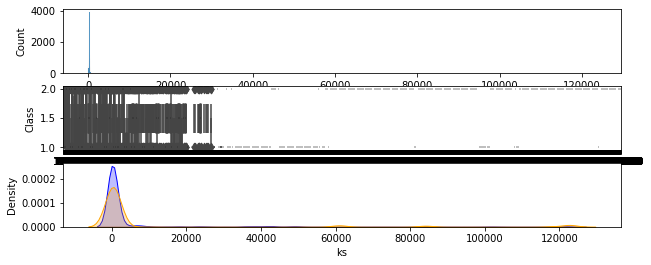

collection_queue_nr


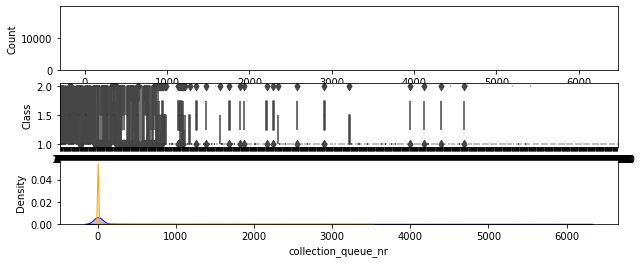

In [18]:
for col in num:
    print(col)
    fig, axs = plt.subplots(3,1, figsize=(10,4))
    sns.histplot(df[col], ax=axs[0])
    sns.boxenplot(data=df, x=col, y='Class', ax=axs[1])
    sns.kdeplot(df1[col], fill=True, label='0', color='blue', ax=axs[2], bw_adjust=0.5)
    sns.kdeplot(df2[col], fill=True, label='1', color='orange', ax=axs[2], bw_adjust=0.5)
    #sns.histplot(train0[col], ax=axs[3], color='blue', alpha=0.5)
    #sns.histplot(train1[col], ax=axs[4], color='orange', alpha=0.5)
    plt.show()

## categorical values

museum_abbr


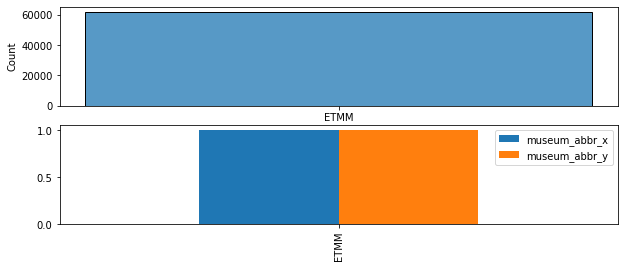

collection_mark


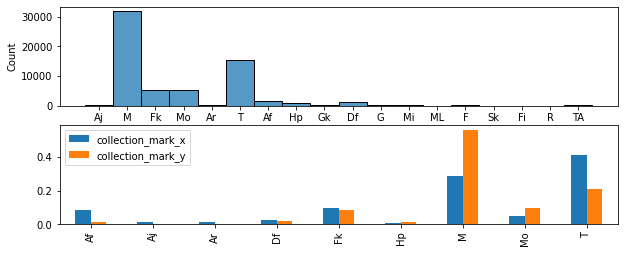

collection_additional_nr


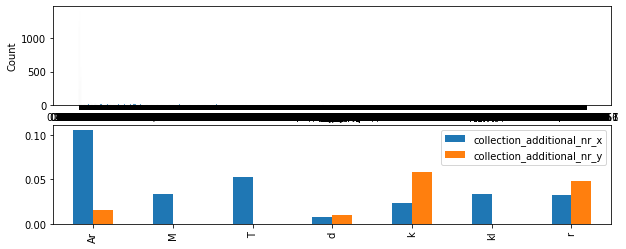

state


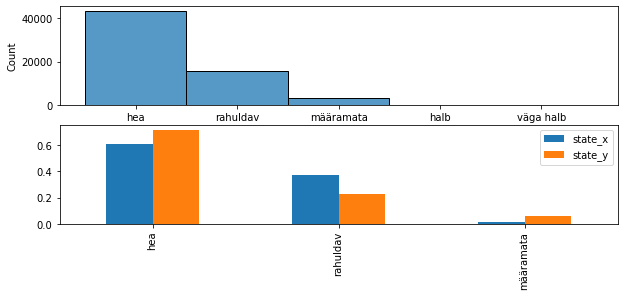

material


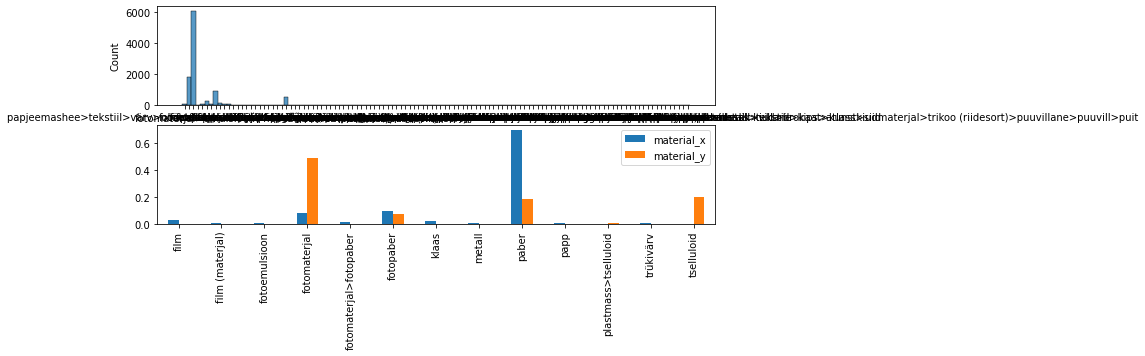

technique


/home/till/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


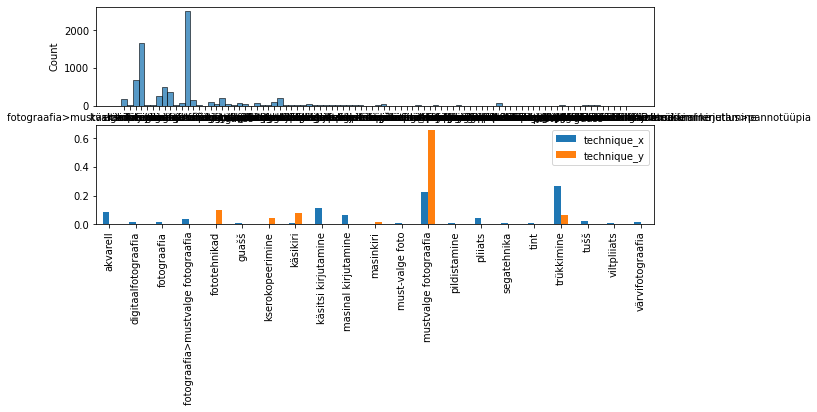

parameter


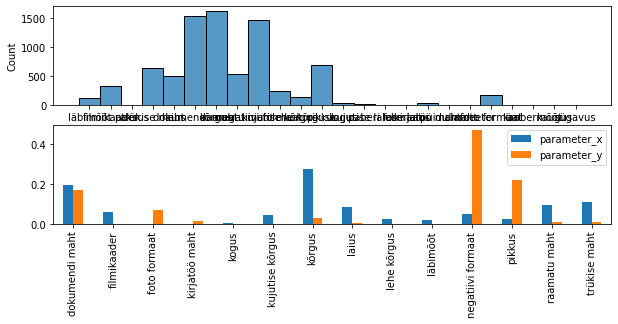

unit


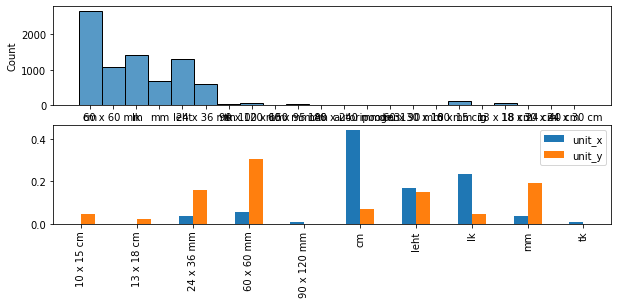

In [17]:
# todo no '' in values -> nan
# combine value_counts series than plot it to have freq counts next to each other

threshold = 0.005

for col in cat:
    print(col)
    fig, axs = plt.subplots(2,1, figsize=(10,4))
    sns.histplot(df[col], ax=axs[0])
    x = len(df1) - df1[col].isnull().sum()
    y = len(df2) - df2[col].isnull().sum()
    a = (df1[col].value_counts()/x)[df1[col].value_counts()/x>threshold]
    b = (df2[col].value_counts()/y)[df2[col].value_counts()/y>threshold]
    a = pd.DataFrame(a)
    b = pd.DataFrame(b)
    c = a.merge(b, left_index=True, right_index=True , how='outer')
    c.plot(kind='bar', ax=axs[1])
    plt.show()

## nan values

In [ ]:
# not similar. pick sufficiently unsparse instances from iset

In [23]:
x = len(like_train_set)
y = len(combined_data)

for col in inter:
    print(col, like_train_set[col].isna().sum()/x, combined_data[col].isna().sum()/y)

text 0.9913136238951539 0.98445
additional_text 0.8602153814893834 0.78355
full_nr 0.9991262826374073 0.3535
event_type 0.9991262826374073 0.3316
location 0.9999796809915676 0.9109
start 0.9993497917301636 0.5728
end 0.9996240983440008 0.9093
before_Christ 0.9993497917301636 0.6087
country_and_unit 0.9991262826374073 0.7422
participants_role 0.9997561718988114 0.549
participant 0.9997561718988114 0.549
parish 1.0 0.9991
museum_abbr 0.0 0.0001
musealia_mark 0.25699481865284973 0.25645
musealia_seria_nr 0.2597074062785736 0.28135
musealia_queue_nr 0.4054556537640963 0.83985
musealia_additional_nr 0.9671949608859087 0.9667
collection_mark 5.079752108097125e-05 0.0001
ks 0.42779640353550746 0.36795
collection_queue_nr 0.6162450472416946 0.25745
collection_additional_nr 0.6185106166819059 0.46175
name 0.0 0.3535
damages 0.9757391039317281 0.9154
state 0.0 0.0
material 0.8879101899827289 0.3535
commentary 0.990013207355481 0.96835
technique 0.9696027633851468 0.59435
parameter 0.888885502387

In [25]:
for col in ['color', 'initial_info', 'legend', 'is_original', 'element_count']:
    print(col, combined_data[col].isna().sum()/y)

color 0.9679
initial_info 0.88395
legend 0.7767
is_original 0.1577
element_count 0.0


# Rest


In [ ]:
typeless_samples = df_merged.sample(n=1000, random_state=42)

In [ ]:
text = get_text_df(typeless_samples.copy())

/home/till/projects/uni/data science/museum_item_classification/prep_helpers.py:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text.text_features = text.text_features.apply(lambda x: x.strip())


In [ ]:
text.to_csv('data/typeless/text.csv', index=True)

In [ ]:
typeless_samples.to_csv('data/typeless/data.csv', index=True)
# running it through preparation.ipynb

In [66]:
train, val, test = get_data(1.0,0)

In [71]:
real = pd.read_csv('data/typeless/ready_good_distribution.csv', index_col='id')

In [72]:
# performs much better with intersection

# fight sparseness -> guess for items with close to no data the same type from train set with often no data is chosen
# only apply to etmm & am typeless subset


import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

def align_features(train_ds, infer_ds, by='all_train'):
    common = [col for col in train_ds.columns if col in infer_ds.columns]
    print(f'Common columns: {len(common)}')

    if by == 'all_train':   
        train_col = train_ds.columns.to_list()
        train_col.remove('type')
        train_not_world_col = [col for col in train_col if col not in infer_ds.columns]
        infer_ds[train_not_world_col] = 0.0
        infer_ds = infer_ds[train_col]
        return train_ds, infer_ds
    elif by == 'intersection':
        train_ds = train_ds[common + ['type']]
        infer_ds = infer_ds[common ]        
        return train_ds, infer_ds
    else:
        raise ValueError('by must be either all_train or intersection')

In [74]:
train, real = align_features(train, real, by='intersection')

Common columns: 130


In [68]:
rfc = RandomForestClassifier()
X = train.drop('type', axis=1)
y = train.type

In [69]:
score = cross_validate(rfc, X, y, cv=5, scoring={'Acc':"accuracy","F1":"f1_macro"})
print(score['test_Acc'].mean(), score['test_F1'].mean())

/home/till/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


0.8474489795918367 0.6233318905502037


In [75]:
X = train.drop('type', axis=1)
y = train.type
rfc = RandomForestClassifier().fit(X, y)

In [79]:
og_real = pd.read_csv('data/typeless/like_train_set.csv', index_col='id')

In [80]:
og_real['type'] = rfc.predict(real)

In [87]:
og_real.head(300)

,Unnamed: 0,text,additional_text,full_nr,event_type,location,start,end,before_Christ,country_and_unit,participants_role,participant,parish,museum_abbr,musealia_mark,musealia_seria_nr,musealia_queue_nr,musealia_additional_nr,collection_mark,ks,collection_queue_nr,collection_additional_nr,name,damages,state,material,commentary,technique,parameter,unit,value,type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1318577.0,2687,Manisk,"Manisk ehk särgi rinnaesine, valgest kahekordsest puuvillriidest, allapoole kitsenev, kõrge, kõva püstise kraega, millel nurgad tagasi keeratud, ees kinnis kolme pärlmutternööbiga, mis on metallist klambriga nööpauku sisse torgatud.Rinnaesine tugevalt tärgeldatud.Krael peal suurus 39 Manisk kuulus Aino äi, Jaan Tannile, kes oli Võrumaal, Viitina valla sekretär. Ta küüditati 1949.a.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,_,37677.0,NaN,NaN,TE,4407.0,NaN,NaN,"Manisk, meeste",NaN,hea,puuvillane,NaN,(kinni-/ kokku-) õmblemine,kõrgus,cm,27.0,maal
1403573.0,3256,"Vannimantel, REVAL HOTELL OLÜMPIA","Vannimantel valgest froteest, pikkade käistega, esiosa kahest tükist, sallkraega, ilma kinniseta, talje kohal vööaasad, kuhu käib samast materjalist kahekordne 4 cm laiune vöö. Hõlmadel neljakandilised taskud, vasakul rinnal siledal paelal punase siiditikandiga kiri\nReval Hotels Olümpia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,_,37976.0,64.0,NaN,TE,4535.0,NaN,NaN,"Vannimantel, Reval Hotel Olümpia",NaN,hea,puuvillane,NaN,(kinni-/ kokku-) õmblemine,pikkus,cm,116.0,lina/linik
1544654.0,3699,"Rinck, H: Eesti rahva mängud ja laulud",H. Lampsoni autogramm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12441.0,70.0,NaN,Ar,3039.0,NaN,NaN,Wolkmars Choralbuch,tiitelleht puudub,rahuldav,paber,NaN,trükkimine,trükise maht,lk,24.0,noodid
1544700.0,3700,"Segakoorid, II: noot",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12441.0,81.0,NaN,Ar,3050.0,NaN,NaN,Segakoorid I,NaN,rahuldav,paber,NaN,trükkimine,trükise maht,lk,34.0,noodid
1544864.0,3703,"Delibes, Leo:noot: Coppelia",Esto-Muusika Tallinnas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12441.0,98.0,NaN,Ar,3067.0,NaN,NaN,Thema aus dem zweiten Satz des d-moll Violin Konzertes nr 9,NaN,rahuldav,paber,NaN,trükkimine,trükise maht,lk,5.0,noodid
1549606.0,4132,"Twain, Mark: näidend: Tom Sayeri imelikud juhtumused",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12449.0,30.0,NaN,Ar,3121.0,NaN,NaN,Maha püksism!,NaN,rahuldav,paber,NaN,käsitsi kirjutamine,trükise maht,lk,12.0,noodid
1581081.0,4388,"Jadassohn,S: Lehrbuch des Kontrapunkts: raamat",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12449.0,89.0,NaN,Ar,3415.0,NaN,NaN,203 Volks Kommers Vaterlandslieder für klavier\n\n,NaN,rahuldav,paber,NaN,trükkimine,trükise maht,lk,92.0,plakat
1581290.0,4391,"Voodikate, drell","Päevatekk, valkjaskollasest puuvilllõngast telgedel kootud drell tehnikas, kahest laiust kokku õmmeldud.Mustriks vertikaalsed drelltehnikas 17 cm laiused triibud. Annetaja Tiiu Kulli tädi Helene Talvik oli Pärnus väikeettevõtja, ta müüs turul kootud silmkoeesemeid. Kuulunud Tiiu Kulli tädile, Helene Talvikule, kes elas Pärnus ja pidas väikest poodi, käis turgudel ja laatadel kauplemas, oli väikese õmblustöökoja omanik.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,_,38273.0,NaN,NaN,TE,4641.0,NaN,NaN,Voodikate,NaN,hea,puuvillane,NaN,kudumine,laius,cm,146.0,lina/linik
2162550.0,5686,"Veinikarahvin „Inna“ rohelinsest klaasist, graveeringuga",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,_,38801.0,NaN,NaN,PK,13312.0,NaN,NaN,"Karahvin Inna, rohelisest klaasist, graveeringuga",NaN,hea,klaas,roheline,graveerimine,kõrgus,cm,26.0,nõu/anum


In [83]:
og_real.type.value_counts()

fotonegatiiv            1192
graafika                 553
plakat                   289
foto                     261
arheoloogiline leid      151
lina/linik                52
dokument                  30
kiri                      15
kavand/joonis/eskiis      15
kleit                     13
pitser/templijäljend      13
nõu/anum                  11
joonistus                 10
noodid                    10
maal                       7
raamat                     6
kott                       3
käsikiri                   2
väiketrükis                2
karikatuur                 1
foto, postkaart            1
ajaleht                    1
skulptuur                  1
ajakiri                    1
Name: type, dtype: int64

In [84]:
train.type.value_counts()

foto                             2680
fotonegatiiv                     1533
kavand/joonis/eskiis              567
kava                              558
arheoloogiline leid               549
plakat                            537
kiri                              434
raamat                            366
dokument                          325
käsikiri                          316
graafika                          163
noodid                            149
käsikiri, laul/ vokaalmuusika     141
münt                              140
pitser/templijäljend              133
digitaalne kujutis                130
postkaart                         108
väiketrükis                        80
ajakiri                            71
kutse                              63
ajaleht                            61
medal                              58
helisalvestis                      54
telegramm                          46
diapositiiv                        42
käsikiri, muusikateos              41
silt/märk   

In [ ]:
dataset = pd.read_csv('data/typeless/text.csv', index_col='id')

max_n_gram = 1
max_features = 4000

stop_words = stopwords_est

CountVec = TfidfVectorizer(ngram_range=(1,max_n_gram), stop_words=stop_words, max_features=max_features)
# to use bigrams ngram_range=(2,2)
Count_data = CountVec.fit_transform(dataset.text_features)
#create dataframe
bow=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())

bow = bow.add_prefix('word_')

/home/till/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aidu', 'bai', 'emb', 'emba', 'emma', 'emmaks', 'emmal', 'emmale', 'emmalt', 'emmas', 'emmasse', 'emmast', 'ha', 'he', 'heldeke', 'hii', 'hip', 'hoh', 'hä', 'hää', 'ih', 'ii', 'jaa', 'killa', 'kimps', 'kips', 'kirr', 'kirra', 'klu', 'kluu', 'kohva', 'kolla', 'kripa', 'krips', 'kõlk', 'kõlla', 'kõlladi', 'kõrra', 'köki', 'liiri', 'lika', 'likat', 'lutu', 'luutu', 'lõka', 'lõkat', 'lõõri', 'mull', 'mäta', 'möki', 'müh', 'müt', 'müta', 'ne', 'nämm', 'nõka', 'nõksat', 'nühkat', 'piiri', 'piu', 'pup', 'pääri', 'põrra', 'raidu', 'rips', 'sahka', 'sahkadi', 'setme', 'setmed', 'setmega', 'setmeid', 'setmeiks', 'setmeil', 'setmeile', 'setmeilt', 'setmeis', 'setmeisse', 'setmeist', 'setmeks', 'setmel', 'setmele', 'setmelt', 'setmena', 'setmeni', 'setmes', 'setmesse', 'setmest', 'setmeta', 'setm

In [ ]:
bow.head()

,word_01,word_02,word_03,word_04,word_05,word_06,word_07,word_08,word_10,word_100,word_101,word_1017,word_1022,word_1024,word_103,word_104,word_106,word_107,word_108,word_1088,word_109,word_11,word_110,word_1102,word_111,word_1134,word_1136,word_1148,word_1166,word_1170,word_1176,word_118,word_1182,word_1184,word_12,word_120,word_121,word_1211,word_1212,word_122,word_1220,word_124,word_1242,word_125,word_126,word_127,word_1289,word_13,word_130,word_133,word_1335,word_1349,word_1350,word_1352,word_137,word_1379,word_1381,word_1383,word_14,word_1404,word_1409,word_141,word_1410,word_142,word_1429,word_143,word_1431,word_144,word_148,word_149,word_15,word_1500,word_1501,word_1516,word_152,word_1535,word_1553,word_1562,word_157,word_158,word_1581,word_1584,word_16,word_1603,word_1644,word_1697,word_17,word_1705,word_1734,word_175,word_1760,word_1765,word_1788,word_18,word_1823,word_1853,word_186,word_1882,word_1883,word_1884,word_19,word_1905,word_1906,word_1909,word_1911,word_1912,word_1913,word_1919,word_192,word_1920,word_1922,word_1924,word_1926,word_1927,word_1929,word_1930,word_1931,word_1932,word_1933,word_1934,word_1935,word_1936,word_1937,word_1938,word_1939,word_1940,word_1941,word_1942,word_1944,word_1945,word_1947,word_1948,word_1950,word_1951,word_1952,word_1954,word_1955,word_1957,word_1958,word_1959,word_1960,word_1961,word_1962,word_1963,word_1964,word_1965,word_1966,word_1967,word_1968,word_1969,word_1970,word_1971,word_1972,word_1973,word_1974,word_1975,word_1976,word_1977,word_1978,word_1979,word_1980,word_1981,word_1982,word_1983,word_1984,word_1985,word_1986,word_1987,word_1988,word_1989,word_1990,word_1991,word_1992,word_1994,word_1995,word_1997,word_1998,word_1999,word_20,word_2000,word_2001,word_2004,word_2005,word_2007,word_2015,word_2056,word_21,word_213,word_216,word_219,word_22,word_220,word_221,word_222,word_2271,word_23,word_2348,word_237,word_2386,word_239,word_2390,word_2391,word_24,word_240,word_241,word_249,word_2497,word_25,word_2502,word_254,word_26,word_260,word_265,word_27,word_2735,word_276,word_277,word_278,word_28,word_29,word_297,word_30,word_308,word_309,word_31,word_317,word_32,word_320,word_34,word_35,word_36,word_37,word_38,word_39,word_40,word_41,word_418,word_42,word_422,word_43,word_430,word_436,word_437,word_45,word_450,word_46,word_47,word_48,word_49,word_50,word_500,word_51,word_52,word_543,word_550,word_562,word_57,word_577,word_580,word_586,word_59,word_60,word_62,word_628,word_63,word_633,word_64,word_6435,word_65,word_66,word_668,word_68,word_69,word_70,word_700,word_71,word_73,word_75,word_751,word_757,word_76,word_760,word_768,word_77,word_78,word_783,word_788,word_79,word_793,word_794,word_796,word_797,word_80,word_81,word_812,word_814,word_817,word_82,word_825,word_827,word_83,word_835,word_84,word_846,word_85,word_86,word_860,word_87,word_88,word_887,word_90,word_901,word_902,word_905,word_906,word_91,word_911,word_916,word_918,word_92,word_928,word_931,word_954,word_956,word_96,word_963,word_964,word_965,word_98,word_996,word_999,word_aasta,word_aastad,word_aastal,word_aastapäeva,word_aastapäevale,word_aastast,word_aastate,word_aastatel,word_abhaasi,word_abhaasia,word_adele,word_aeg,word_ahjukahli,word_ait,word_ajal,word_ajaleht,word_ajaloo,word_akt,word_alam,word_album,word_albumis,word_aleksei,word_alevist,word_ambla,word_an,word_andis,word_andmed,word_andmeid,word_andnud,word_anna,word_ansv,word_antud,word_apr,word_aprillil,word_aravete,word_armee,word_arro,word_arve,word_astel,word_august,word_augustini,word_augustis,word_autonoomse,word_autor,word_avamine,word_bilet,word_bockmanni,word_brunovski,word_cd,word_cm,word_deponeeritud,word_der,word_des,word_dets,word_detsembris,word_diapos,word_diar,word_die,word_digifoto,word_direktor,word_dr,word_ea,word_edgar,word_eduard,word_eesti,word_eestis,word_ehitatud,word_ehitused,word_eine,word_eisler,word_ej,word_ekspeditsiooni,word_ekspeditsioonil,word_elamu,word_elamusisustus,word_elas,word_elatusalad,word_elu,word_em,word_

In [ ]:
train, b,c = get_bow(2,4000)

/home/till/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aidu', 'bai', 'emb', 'emba', 'emma', 'emmaks', 'emmal', 'emmale', 'emmalt', 'emmas', 'emmasse', 'emmast', 'ha', 'he', 'heldeke', 'hii', 'hip', 'hoh', 'hä', 'hää', 'ih', 'ii', 'jaa', 'killa', 'kimps', 'kips', 'kirr', 'kirra', 'klu', 'kluu', 'kohva', 'kolla', 'kripa', 'krips', 'kõlk', 'kõlla', 'kõlladi', 'kõrra', 'köki', 'liiri', 'lika', 'likat', 'lutu', 'luutu', 'lõka', 'lõkat', 'lõõri', 'mull', 'mäta', 'möki', 'müh', 'müt', 'müta', 'ne', 'nämm', 'nõka', 'nõksat', 'nühkat', 'piiri', 'piu', 'pup', 'pääri', 'põrra', 'raidu', 'rips', 'sahka', 'sahkadi', 'setme', 'setmed', 'setmega', 'setmeid', 'setmeiks', 'setmeil', 'setmeile', 'setmeilt', 'setmeis', 'setmeisse', 'setmeist', 'setmeks', 'setmel', 'setmele', 'setmelt', 'setmena', 'setmeni', 'setmes', 'setmesse', 'setmest', 'setmeta', 'setm

7284
3166
4517


In [ ]:
train.head()

,word_01,word_02,word_03,word_04,word_04 98,word_05,word_06,word_06 98,word_07,word_08,word_08 2013,word_09,word_10,word_10 11,word_100,word_11,word_11 1948,word_112,word_112 isikukogu,word_12,word_13,word_14,word_15,word_15 08,word_16,word_17,word_18,word_19,word_1905,word_1908,word_1912,word_1913,word_1917,word_1919,word_1920,word_1924,word_1925,word_1926,word_1927,word_1928,word_1929,word_1930,word_1930 aastate,word_1931,word_1932,word_1933,word_1934,word_1935,word_1936,word_1937,word_1938,word_1939,word_1940,word_1941,word_1942,word_1943,word_1944,word_1945,word_1946,word_1947,word_1948,word_1949,word_1950,word_1951,word_1952,word_1953,word_1954,word_1955,word_1956,word_1957,word_1958,word_1959,word_1960,word_1961,word_1962,word_1963,word_1964,word_1965,word_1966,word_1967,word_1968,word_1969,word_1970,word_1971,word_1972,word_1973,word_1974,word_1975,word_1976,word_1976 80,word_1977,word_1978,word_1979,word_1980,word_1982,word_1982 1991,word_1983,word_1983 1990,word_1984,word_1985,word_1986,word_1987,word_1988,word_1989,word_1990,word_1990 aastatel,word_1991,word_1991 876,word_1993,word_1995,word_1996,word_1997,word_1999,word_20,word_20 12,word_2001,word_2002,word_2003,word_2004,word_2005,word_2006,word_2006 2017,word_2007,word_2008,word_2009,word_2010,word_2010 antud,word_2011,word_2012,word_2013,word_2013 7395,word_2013 osaliselt,word_2014,word_2014 aasta,word_2015,word_2015 2019,word_2016,word_2017,word_2017 2018,word_2017 autor,word_2018,word_2018 t170,word_2019,word_21,word_21 06,word_22,word_23,word_24,word_25,word_25 04,word_26,word_27,word_28,word_29,word_30,word_31,word_32,word_35,word_35 mm,word_40,word_50,word_520,word_520 m520,word_54,word_60,word_7395,word_7395 15,word_80,word_876,word_876 897,word_897,word_897 küntud,word_98,word_98 21,word_98 metalliotsijaga,word_aardeleid,word_aardeleid metallnõus,word_aarne,word_aasta,word_aasta oktoobris,word_aastad,word_aastal,word_aastapäeva,word_aastaselt,word_aastast,word_aastat,word_aastate,word_aastatel,word_aastatel ii,word_aastatest,word_abikaasa,word_agu,word_agu püümani,word_aime,word_aime undi,word_aino,word_aino tamm,word_aino tammele,word_ajakiri,word_ajal,word_ajaloomuuseum,word_ajaloomuuseum andis,word_ajaloomuuseumi,word_ajaloomuuseumi fotokoguhoidja,word_ajavahemikust,word_akt,word_aktile,word_aktile nr,word_album,word_albumid,word_albumilehele,word_albumis,word_albumis ajaloomuuseumi,word_aleksander,word_alfred,word_aloe,word_aloe autogramm,word_am,word_andis,word_andis parikase,word_andres,word_ann,word_anna,word_annab,word_anne,word_annetatud,word_annetatud kavandid,word_ants,word_antud,word_antud mikk,word_arhiiv,word_arhiivmaterjalid,word_arhiivmaterjalid fotod,word_arhiivmaterjalidega,word_arhiivmaterjalidega varasemalt,word_arhiivraamatukogu,word_arhiivraamatukogu raamatud,word_artur,word_arvatavasti,word_arvo,word_asjad,word_atsetaatfilm,word_augud,word_august,word_aut,word_autogramm,word_autor,word_balletilavastusest,word_boris,word_ca,word_ca 2010,word_cappella,word_carmen,word_carmen mikiveri,word_cm,word_dbg,word_de,word_dekoratsioonikavand,word_dekoratsioonikavand lavastusele,word_denaar,word_denaar mündiaare,word_der,word_diapositiiv,word_die,word_digidotod,word_digidotod rakvere,word_digifotod,word_digifotod 2015,word_dir,word_dokumendid,word_dokumendid fotod,word_dokument,word_don,word_draamateater,word_draamateatri,word_draamateatris,word_eduard,word_eduard visnapuu,word_eesti,word_eesti ajaloomuuseum,word_eesti ajaloomuuseumi,word_eesti draamateater,word_eesti helikunsti,word_eesti kogust,word_eesti kontsert,word_eesti laskurkorpus,word_eesti nsv,word_eesti raadio,word_eesti selts,word_eesti teatri,word_eesti vene,word_eestimaa,word_eestimaa kirjanduse,word_ellen,word_eller,word_eller heino,word_ellerile,word_ellu,word_elmar,word_els,word_elu,word_ema,word_emulsioonil,word_endel,word_endise,word_endla,word_ensv,word_ensv riiklik,word_eri,word_eri klasi,word_erika,word_erinevate,word_ernesaks,word_erso,word_eseme,word_eseme ktk,word_esem

In [ ]:
train, bow = align_features(train, bow)

Common columns: 848


In [ ]:
rfc = RandomForestClassifier().fit(train.drop('type', axis=1), train.type)

In [ ]:
og_world['type'] = rfc.predict(bow)

In [ ]:
og_world.head(200)

,text,additional_text,full_nr,event_type,location,start,end,before_Christ,country_and_unit,participants_role,participant,parish,museum_abbr,musealia_mark,musealia_seria_nr,musealia_queue_nr,musealia_additional_nr,collection_mark,ks,collection_queue_nr,collection_additional_nr,name,damages,state,material,commentary,technique,parameter,unit,value,type
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
457155.0,NaN,Eset kasutati peamiselt liiprite tahumisel. Ehitustöödel kasutatud töövahendeid ja teisi etnograafilisi esemeid.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MF,_,13.0,31.0,NaN,E,8.0,31.0,NaN,Kirves.,NaN,rahuldav,puit>teras,,NaN,ümbermõõt,cm,13.00,käsikiri
3739245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,_,9887.0,NaN,NaN,G,1739.0,NaN,NaN,Sissetung linnusesse,NaN,hea,paber,NaN,puulõige,kõrgus,cm,8.40,käsikiri
361034.0,NaN,"Vene-Poola 50 krossi, 1846.a.\r\nG.Matto kogu.\r\nNumismaatiliste kogude inv. raamat nr.11. 25 / kopeek (slaavi tähed)/ 50 / GROSZY/ 1846 Kahe peaga krooni kandev kotkas valitsuskepi ja riigiõunaga Vasakul loorberi-, paremal tammeoks.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TM,_,1198.0,191.0,NaN,N,132.0,191.0,NaN,"Münt, Vene-Poola 50 krossi",NaN,rahuldav,hõbe,NaN,NaN,kaal,g,4.94,raamat
1420914.0,Endla teatri näitlejad.,30225 Pärnu näitlejad 8 pruuni 5 halli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12497.0,43.0,NaN,Fk,9745.0,NaN,kl,Endla teatri näitlejad.,NaN,hea,fotomaterjal,klaasnegatiiv,NaN,kõrgus,cm,12.00,kiri
2196654.0,Voldik: C. R. Jakobsoni Talumuuseumist soome keeles,Venekeelne lühiülevaade C. R. Jakobsoni elust ja muuseumi ajaloost. Muuseumi 2010. aasta ürituste kava.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRJM,PK TR IV,3137.0,NaN,NaN,Ar,1680.0,NaN,NaN,Voldik: C. R. Jakobsoni Talumuuseumist soome keeles,NaN,hea,NaN,NaN,NaN,pikkus,cm,20.90,kava
794620.0,NaN,"Fk 1660:1-7\nFotod rõivastusest. Fotod kuuluvad E. Sarapuu 1973. aasta võistlustöö ""Minu rõivastusest"" juurde. Andis üle Hele Eisler, EM-i Korrespondentide Võrgu juhendaja.\nEM-i vvakt 1973:20, 1973. a.\nFotopäeviku nr. 894, 1973. a.\nKatalooginud 1973. aasta mais V. Mõtsar. Foto teadmata.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ERM,NaN,NaN,NaN,NaN,Fk,1660.0,7.0,NaN,Tartu Õpetajate Seminari VI b klassi neiud 1926. aasta kevadel,NaN,määramata,NaN,NaN,NaN,NaN,NaN,NaN,foto
1406633.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TLM,_,12927.0,3.0,NaN,Dd,NaN,NaN,NaN,Teade Sergei Schillingule Eesti Punase Risti eluaegseks liikmeks vastuvõtmise kohta 1922,NaN,määramata,NaN,NaN,NaN,NaN,NaN,NaN,fotonegatiiv
3791598.0,NaN,Glasuuritud kivikeraamilise nõu kild.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PäMu,_,14641.0,NaN,NaN,A,2509.0,1001.0,3,savinõu,NaN,rahuldav,keraamika,NaN,NaN,NaN,NaN,NaN,käsikiri
1176769.0,NaN,"ajaleht Signaal 52/ 24.12. 1969 \r\n\r\nTöökaitse, töö-ja tootmiskultuur kõrgele tasemele\r\nTöötatakse 1970. aasta arvel\r\nEesliinivõitlejad\r\nSpordiaktivistide kokkutulek\r\nEttevaatus on ohutuse pant\r\nSeljataga on veerand sajandit\r\nSüüdlane sai karistada\r\nAutojuht ja loodus\r\nPaidelaste liidrid\r\nRäägiti liiklusohutusest\r\nAutohalvatuse vastu\r\nValgusfoorid Tallinnas\r\nMida avastas patrull?\r\nPimedal maanteel\r\n",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EMM,_,265.0,129.0,NaN,A,187.0,129.0,NaN,ajaleht Signaal 52/ 24.12. 1969,NaN,rahuldav,NaN,NaN,NaN,NaN,NaN,NaN,plakat


In [ ]:
list(train.columns)

['ks',
 'musealia_seria_nr',
 'musealia_queue_nr',
 'collection_queue_nr',
 'element_count',
 'type',
 '* IN *',
 'aeg/ kestus IN sajand',
 'diameeter IN cm',
 'dokumendi maht IN leht',
 'dokumendi maht IN lk',
 'kaal IN g',
 'kaugus IN cm',
 'kirjatöö maht IN autoripoogen',
 'kogus IN tk',
 'kujutise kõrgus IN cm',
 'kujutise laius IN cm',
 'kõrgus IN cm',
 'laius IN cm',
 'lehe kõrgus IN cm',
 'lehe laius IN cm',
 'läbimõõt IN cm',
 'pikkus IN cm',
 'puidu maht IN dm3',
 'raamatu maht IN lk',
 'suurus (riietus) IN number',
 'trükise maht IN lk',
 'ümbermõõt IN cm',
 'filmikaader IN mm²_height',
 'filmikaader IN mm²_width',
 'foto formaat IN mm²_height',
 'foto formaat IN mm²_width',
 'negatiivi formaat IN mm²_height',
 'negatiivi formaat IN mm²_width',
 'material_albumiinpaber',
 'material_atsetaattselluloosfilm',
 'material_biljoon',
 'material_emulsioon',
 'material_film',
 'material_film (materjal)',
 'material_fotoemulsioon',
 'material_fotomaterjal',
 'material_fotopaber',
 'mat